In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tcheading">Table Of Contents</h1>
<div id ="toc"></div>

# The Original Data Set
For thousands of customers and products, we had three tables:
1. Table 1: Supermarket Distances
    * **customer_id**: a unique customer identifyer
    * **shop_id**: a unique identifier for a shop
    * **distance** Distnace from customer to shop (straight line), meters (no accounting for road distance)
2. Table 2: Supermarket Prices
    * **product_id**: unique identifier for a product in a supermarket
    * **unit_price**: average price for a given product per unit, over time span of data set
3. Table 3: Supermarket Purchases:
    * **customer_id** 
    * **product_id**
    * **shop_id**
    * **items_bought**: total amount of items bought by a customer in that particular shop

Data has been aggregated from January 2011 to December 2011. The data has been aggregated by customer, and info from different shops are pivoted to rows per customer.

# The Merged Data Set
* **customer_id**: The primary key of the data set, all other columns reference data to each customer.
* **avg_distance_to_shops**: The average distance to all shops in data set
* **min_distance_to_shops**: The distance to the closest shop
* **max_distance_to_shops**: The distance to the furthest shop
* **products_purchased**: The total number of purchased products
* **unique_products_purchased**: The number of unique products purchased by a customer
* **amount_purchased**: Total money spent
* **avg_purchase**: The average price of a single purchase from a store
* **avg_price**: Price/unit item 
* **shops_used**: number of unique shops visited by each user
* **distance_shop_N**: distnace to shop 1-5 (N is 1-5)
* **products_purchased_shop_N**: number of products purchased at shop 1-5 (N is 1-5)
* **unique_products_purchased_shop_N**: number of unique products purchased at shop 1-5 (N is 1-5)
* **amount_purchased_shop_N**: amount of money spent at shops 1-5 (N is 1-5)
* **avg_purchase_shop_N**: amount of money on average spent at shops 1-5 (N is 1-5)
* **avg_price_shop_1**: average price per item purchased at shops 1-5 (N is 1-5)

# Preliminary Questions
1. Is there a correllation between amount spent, and distance travelled?
2. Do people spend more per item on items bought at a shop far away?
3. Do people buy more items from near shops or far shops?
4. How does the variety of items purchased vary with distance?
5. How does the variety of items purchased vary with total amount customers spend?

# Deeper Questions
1. What correllates to customers spending more money?
2. Can we predict how much customers will spend based on factors?
3. Can we predict the variety of items customers will purchase based on factors?
4. Does the average distance between consumers and stores inform where we should build stores?

# Data Exploration

## Import Analysis Libraries

In [3]:
%matplotlib inline
import pandas as pd
import nltk
import numpy
import random
import matplotlib.pyplot as plt
import seaborn
from sklearn import metrics

## Load the data to a Pandas Dataframe

In [4]:
df = pd.DataFrame.from_csv('./data/supermarket_data_aggr.csv')

# Check out this sweet-ass data
df.head()

,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,distance_shop_1,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
customer_id,,,,,,,,,,,,,,,,,,,,,
1,1434.91910,985.87620,4082.5222,3090,473,7551.701,14.221659,3.150493,2,4082.5222,...,10.441143,14.862848,0.000000,0,0.000000,6.393403,2.600485,0.000000,0,0.000000
2,909.76764,254.94832,2295.4840,4508,486,7820.219,11.235947,2.191422,4,1115.3433,...,3.761943,4.848720,2.546600,0,16.479185,2.851152,2.009863,2.059450,0,2.103394
3,1498.94700,754.29560,2831.7727,814,234,1788.613,5.453088,2.258994,4,1418.8348,...,3.757062,5.605183,1.923385,0,5.924268,3.426687,2.478529,1.923385,0,1.947067
4,561.65900,362.79178,2210.3820,648,208,1679.520,5.976940,2.614292,4,1104.3829,...,4.997400,2.688400,5.029184,0,7.156351,4.997400,2.688400,2.083168,0,2.754427
5,605.36280,275.46753,1375.1184,13,10,17.922,1.792200,1.692000,2,1913.7630,...,0.000000,0.967667,2.145571,0,0.000000,0.000000,0.633667,2.145571,0,0.000000


In [13]:
df.columns.values

array(['avg_distance_to_shops', 'min_distance_to_shops',
       'max_distance_to_shops', 'products_purchased',
       'unique_products_purchased', 'amount_purchased', 'avg_purchase',
       'avg_price', 'shops_used', 'distance_shop_1', 'distance_shop_2',
       'distance_shop_3', 'distance_shop_4', 'distance_shop_5',
       'products_purchased_shop_1', 'products_purchased_shop_2',
       'products_purchased_shop_3', 'products_purchased_shop_4',
       'products_purchased_shop_5', 'unique_products_purchased_shop_1',
       'unique_products_purchased_shop_2',
       'unique_products_purchased_shop_3',
       'unique_products_purchased_shop_4',
       'unique_products_purchased_shop_5', 'amount_purchased_shop_1',
       'amount_purchased_shop_2', 'amount_purchased_shop_3',
       'amount_purchased_shop_4', 'amount_purchased_shop_5',
       'avg_purchase_shop_1', 'avg_purchase_shop_2', 'avg_purchase_shop_3',
       'avg_purchase_shop_4', 'avg_purchase_shop_5', 'avg_price_shop_1',
       'a

## Make some plots to derive insights

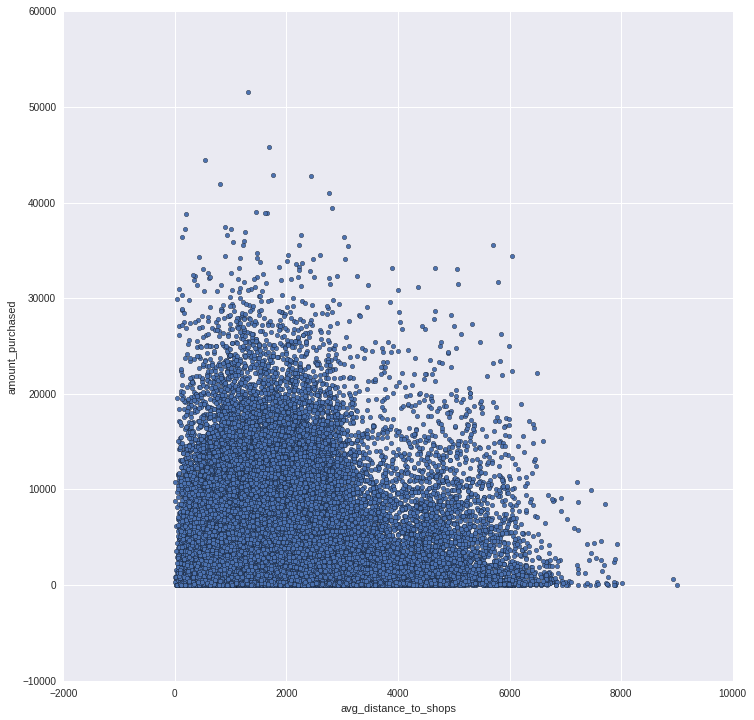

In [5]:
df.plot(x='avg_distance_to_shops',y='amount_purchased',kind='scatter',figsize=(12,12))

# Actionable Insights

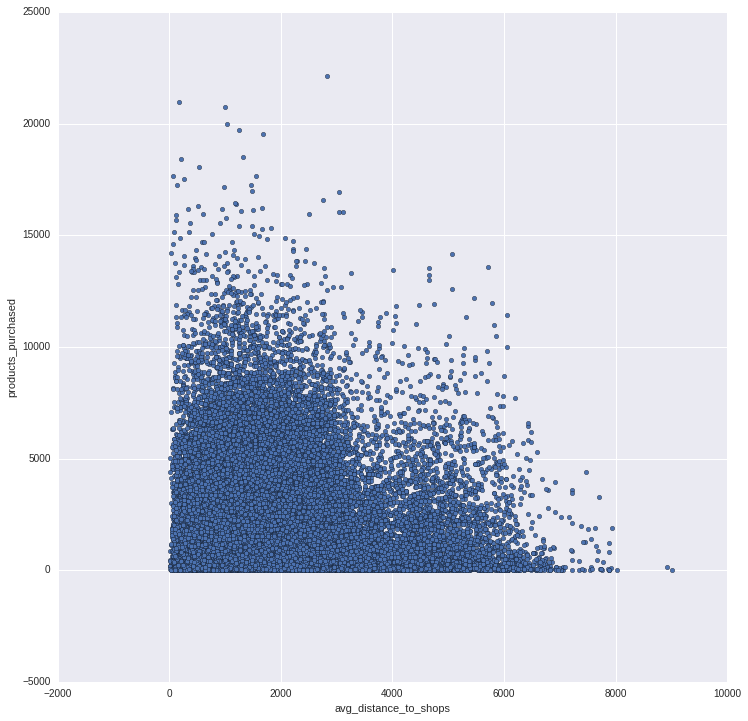

In [9]:
df.plot(x='avg_distance_to_shops',y='products_purchased',kind='scatter',figsize=(12,12))

# Try this stuff
* df scatter matrix 
* Relationship between store distance and spending
* Average distance
* group by shop used amount purchased goes up as distance to store goes down
* Unique products vs density
* CDF Plot - where is the revenue coming from (what proporiton of revenue is coming from what % of customers?)